In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
file_path = 'data/experiment-speedlimit-totalV.csv'
df = pd.read_csv(file_path)

# 使用numpy分割数据框
num_cols = df.shape[1]
split_dfs = np.split(df, num_cols // 4, axis=1)

# 删除每组的第一个元素（列）
split_dfs = [df_group.drop(df_group.columns[0], axis=1) for df_group in split_dfs]

# 创建一个字典，将键从20分配给每个组,观测范围
result_dict = {}
key_start = 0

for i, split_df in enumerate(split_dfs):
    # 将数据框转换为列表形式
    split_list = split_df.values.tolist()
    # 将列表存储到字典中
    key = key_start + i
    key_r = round(key,2)
    result_dict[key_r] = split_list

# 显示最终字典
print(result_dict)

{0: [[0, 0, 3]], 1: [[0, 0, 0]], 2: [[1, 1, 1]], 3: [[3, 2, 0]], 4: [[0, 3, 1]], 5: [[0, 2, 0]], 6: [[0, 7, 1]], 7: [[1, 3, 1]], 8: [[3, 0, 6]], 9: [[8, 0, 5]], 10: [[7, 2, 9]], 11: [[12, 1, 8]], 12: [[3, 2, 9]], 13: [[1, 2, 10]], 14: [[5, 6, 5]], 15: [[7, 8, 12]], 16: [[8, 0, 11]], 17: [[13, 0, 11]], 18: [[10, 0, 13]], 19: [[4, 5, 4]], 20: [[8, 3, 8]], 21: [[12, 2, 10]], 22: [[7, 2, 14]], 23: [[3, 5, 15]], 24: [[15, 0, 8]], 25: [[15, 0, 9]], 26: [[9, 0, 12]], 27: [[14, 0, 6]], 28: [[7, 0, 7]], 29: [[12, 2, 6]], 30: [[8, 0, 5]], 31: [[14, 4, 9]], 32: [[12, 0, 2]], 33: [[14, 0, 4]], 34: [[17, 0, 5]], 35: [[16, 0, 5]], 36: [[10, 0, 7]], 37: [[9, 0, 7]], 38: [[6, 0, 2]], 39: [[16, 0, 9]], 40: [[18, 0, 2]], 41: [[25, 0, 4]], 42: [[17, 0, 6]], 43: [[21, 0, 5]], 44: [[23, 0, 3]], 45: [[22, 0, 4]], 46: [[13, 0, 5]], 47: [[14, 0, 6]], 48: [[22, 0, 2]], 49: [[22, 0, 5]], 50: [[21, 0, 3]], 51: [[18, 0, 5]], 52: [[26, 0, 4]], 53: [[24, 0, 3]], 54: [[21, 0, 6]], 55: [[12, 0, 3]]}


/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
# 提取x轴（keys）和y轴（每个list的第二个元素）
x_values = list(result_dict.keys())
y_values = [value[0][1] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y_values)

# 提取y轴（每个list的第3个元素）
y2_values = [value[0][2] for value in result_dict.values()]  # 假设只取每组中第一行的第二个元素
# print(y2_values)

In [14]:
# 初始化列表
totalV = []

# 生成后续的数字列表
for num in range(1, 31 + 1, 5):
    totalV.extend([num] * 8)

# 打印结果列表
print(totalV)

[1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 16, 16, 16, 16, 16, 16, 16, 16, 21, 21, 21, 21, 21, 21, 21, 21, 26, 26, 26, 26, 26, 26, 26, 26, 31, 31, 31, 31, 31, 31, 31, 31]


In [15]:
# 初始化列表
speedLimit = []

# 生成后续的数字列表
for _ in range(7):
    speedLimit.extend([1,2,3,4,5,6,7,8])

# 打印结果列表
print(speedLimit)

[1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8]


In [16]:
data = {
    'totalV':totalV,
    'speedLimit':speedLimit,
    'j-noInView':y_values,
    'j-calc':y2_values
}
df = pd.DataFrame(data)
df

,totalV,speedLimit,j-noInView,j-calc
0,1,1,0,3
1,1,2,0,0
2,1,3,1,1
3,1,4,2,0
4,1,5,3,1
5,1,6,2,0
6,1,7,7,1
7,1,8,3,1
8,6,1,0,6
9,6,2,0,5


回归系数: [-0.10089286  0.39115646]
截距: 0.9612244897959181
R²: 0.49184443842986725


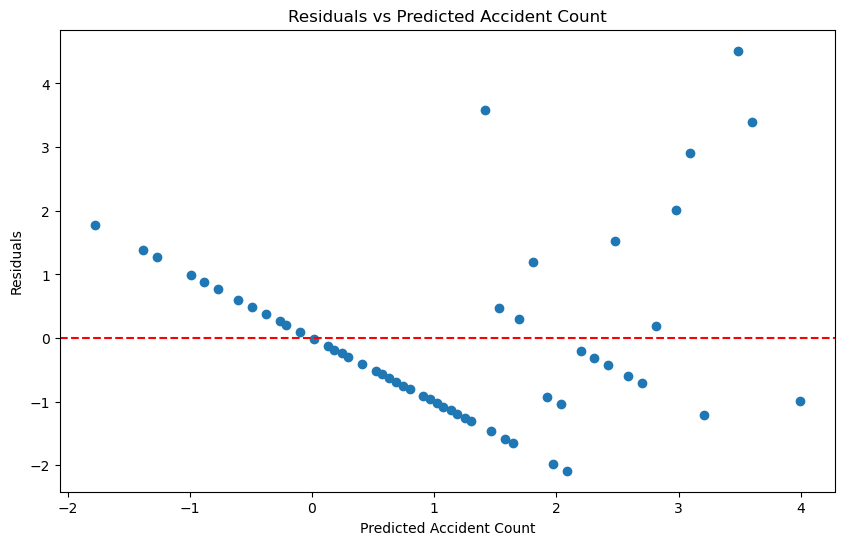

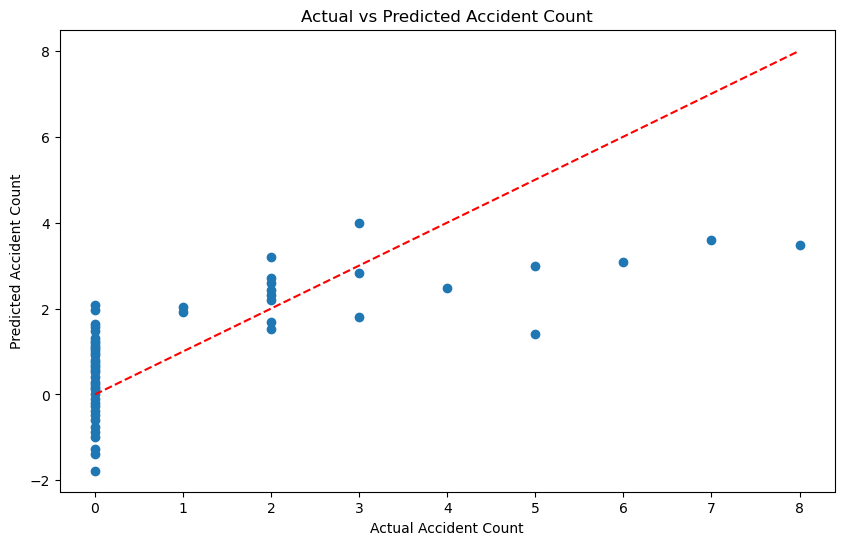

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


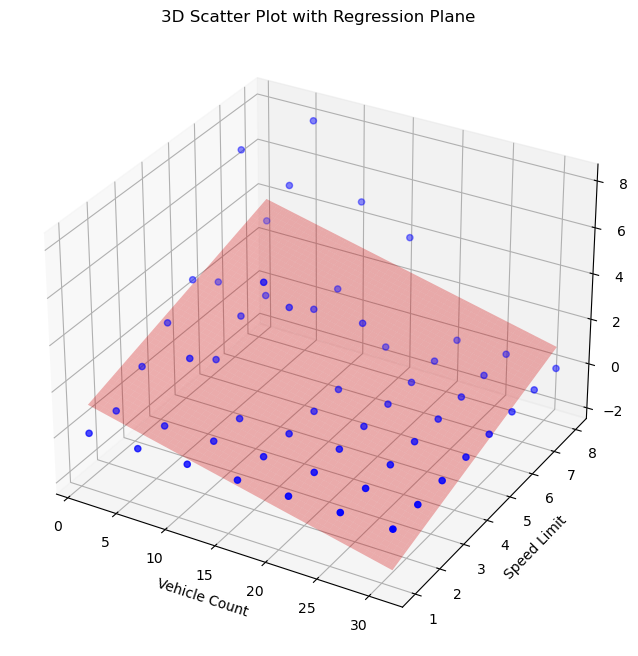

In [8]:
# 自变量 (X) 和 因变量 (y)
X = df[['totalV', 'speedLimit']]
y = df['j-noInView']

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 预测结果
y_pred = model.predict(X)

# 输出回归系数
print("回归系数:", model.coef_)
print("截距:", model.intercept_)

# 评估模型
r2 = r2_score(y, y_pred)
print("R²:", r2)

# 1. 残差图
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Accident Count')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Accident Count')
plt.show()

# 2. 实际值 vs 预测值图
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Accident Count')
plt.ylabel('Predicted Accident Count')
plt.title('Actual vs Predicted Accident Count')
plt.show()

# 3. 3D散点图与回归平面
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(df['totalV'], df['speedLimit'], y, color='blue', label='Actual')

# 绘制回归平面
x_surf, y_surf = np.meshgrid(np.linspace(df['totalV'].min(), df['totalV'].max(), 100),
                             np.linspace(df['speedLimit'].min(), df['speedLimit'].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Speed Limit')
ax.set_zlabel('Accident Count')
ax.set_title('3D Scatter Plot with Regression Plane')
plt.show()

In [9]:
totalV_values = df['totalV'].unique()
totalV_values

array([ 1,  6, 11, 16, 21, 26, 31])

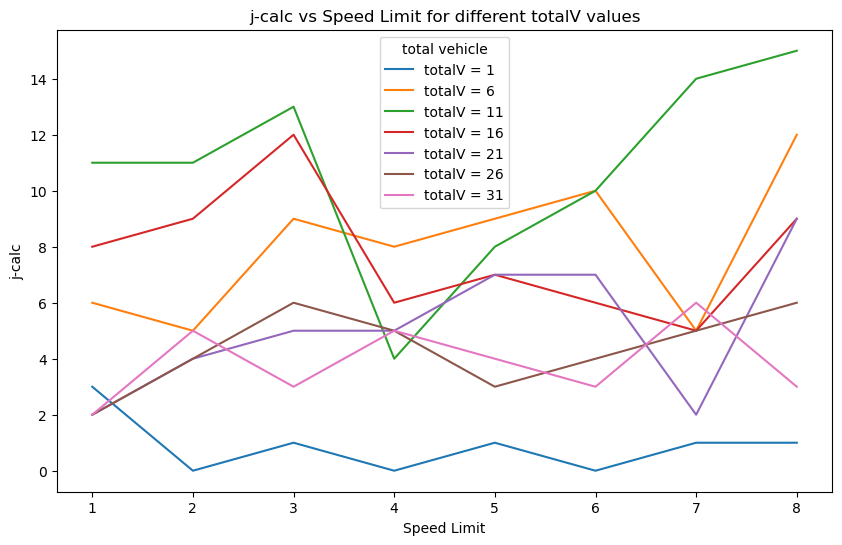

In [10]:
# 绘制图表
plt.figure(figsize=(10, 6))

for totalV in totalV_values:
    # 筛选出每个 totalV 对应的数据
    subset = df[df['totalV'] == totalV]
    
    # 绘制折线图
    plt.plot(subset['speedLimit'], subset['j-calc'], marker='', label=f'totalV = {totalV}')

# 添加图表标签和标题
plt.xlabel('Speed Limit')
plt.ylabel('j-calc')
plt.title('j-calc vs Speed Limit for different totalV values')
plt.legend(title='total vehicle')

# 显示图表
plt.show()

回归系数:
 const         0.961224
totalV       -0.100893
speedLimit    0.391156
dtype: float64

P值:
 const         0.066562
totalV        0.000002
speedLimit    0.000016
dtype: float64

置信区间:
                    0         1
const      -0.068024  1.990473
totalV     -0.138685 -0.063101
speedLimit  0.226218  0.556095

R²: 0.49184443842986725

方差膨胀因子（VIF）:
    VIF Factor    features
0    7.417143       const
1    1.000000      totalV
2    1.000000  speedLimit


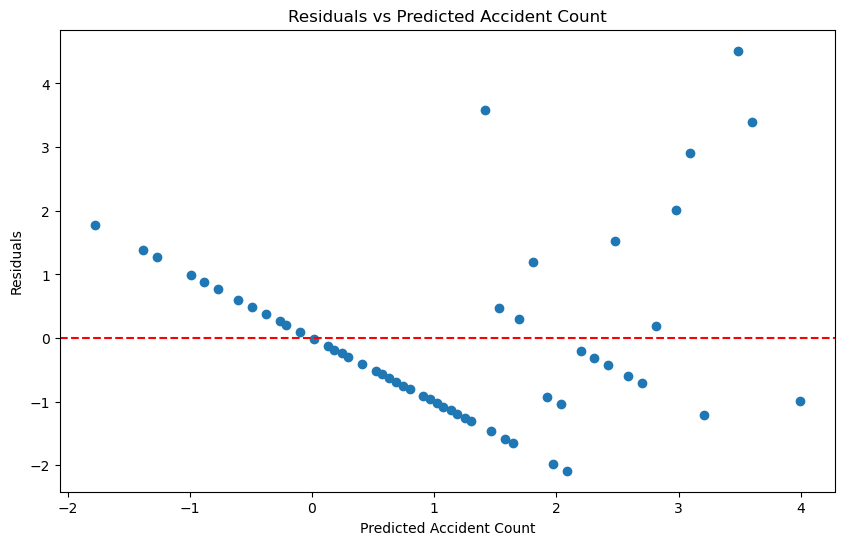

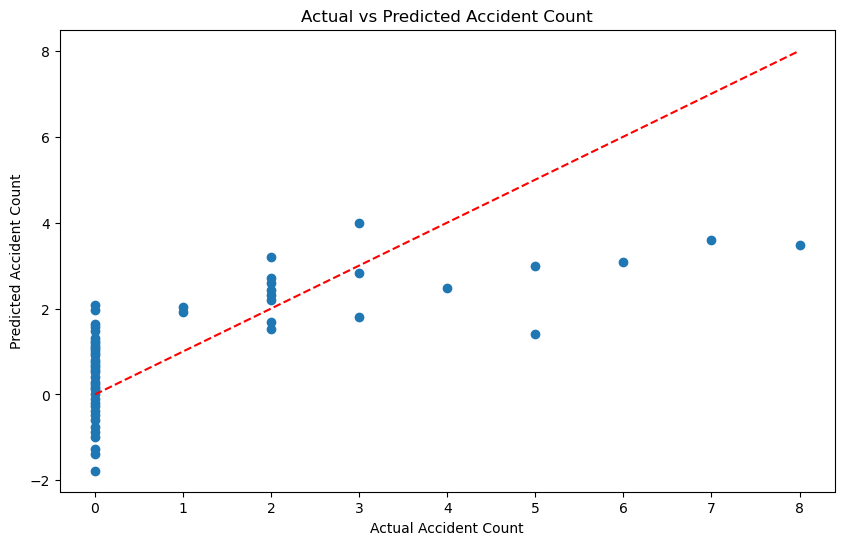

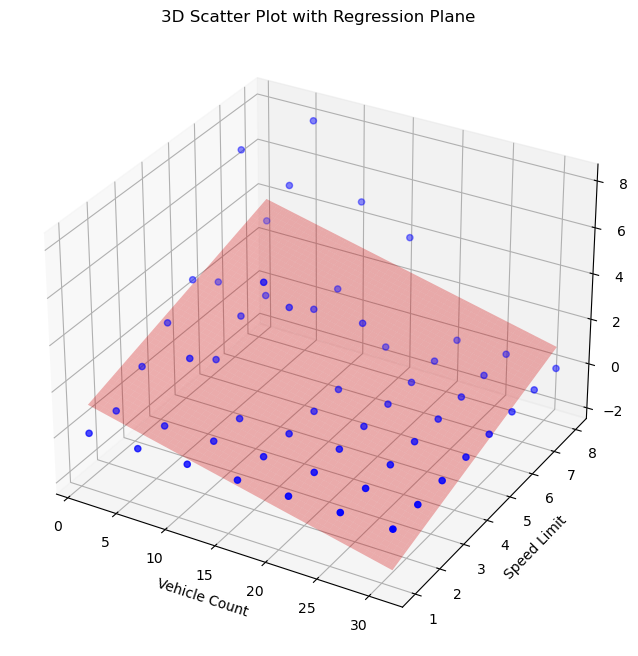

In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt

# 自变量和因变量
X = df[['totalV', 'speedLimit']]
y = df['j-noInView']

# 增加常数项
X = sm.add_constant(X)

# 创建线性回归模型
model = sm.OLS(y, X)

# 拟合模型
results = model.fit()

# 输出回归系数、p值和置信区间
print("回归系数:\n", results.params)
print("\nP值:\n", results.pvalues)
print("\n置信区间:\n", results.conf_int())

# 评估模型
r2 = results.rsquared
print("\nR²:", r2)

# 计算方差膨胀因子（VIF）
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("\n方差膨胀因子（VIF）:\n", vif)

# 1. 残差图
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Accident Count')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Accident Count')
plt.show()

# 2. 实际值 vs 预测值图
plt.figure(figsize=(10, 6))
plt.scatter(y, results.fittedvalues)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Accident Count')
plt.ylabel('Predicted Accident Count')
plt.title('Actual vs Predicted Accident Count')
plt.show()

# 3. 3D散点图与回归平面
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(df['totalV'], df['speedLimit'], y, color='blue', label='Actual')

# 绘制回归平面
x_surf, y_surf = np.meshgrid(np.linspace(df['totalV'].min(), df['totalV'].max(), 100),
                             np.linspace(df['speedLimit'].min(), df['speedLimit'].max(), 100))
z_surf = results.predict(sm.add_constant(np.array([x_surf.ravel(), y_surf.ravel()]).T)).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel('Vehicle Count')
ax.set_ylabel('Speed Limit')
ax.set_zlabel('Accident Count')
ax.set_title('3D Scatter Plot with Regression Plane')
plt.show()
